In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

DATA_ROOT = Path("../data/raw/barber")
LAP_PATH = DATA_ROOT / "R1_barber_lap_time.csv"   # adjust name if slightly different

LAP_PATH, LAP_PATH.exists()

(PosixPath('../data/raw/barber/R1_barber_lap_time.csv'), True)

In [2]:
df_lap = pd.read_csv(LAP_PATH)
df_lap.head()

,expire_at,lap,meta_event,meta_session,meta_source,meta_time,original_vehicle_id,outing,timestamp,vehicle_id,vehicle_number
0,NaN,2,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:40:41.927Z,GR86-002-000,0,2025-09-06T18:40:41.775Z,GR86-002-000,0
1,NaN,3,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:42:28.189Z,GR86-002-000,0,2025-09-06T18:42:25.504Z,GR86-002-000,0
2,NaN,4,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:44:42.583Z,GR86-002-000,0,2025-09-06T18:44:41.000Z,GR86-002-000,0
3,NaN,5,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:46:44.358Z,GR86-002-000,0,2025-09-06T18:46:42.663Z,GR86-002-000,0
4,NaN,6,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:48:22.301Z,GR86-002-000,0,2025-09-06T18:48:21.403Z,GR86-002-000,0


In [3]:
df_lap.columns

Index(['expire_at', 'lap', 'meta_event', 'meta_session', 'meta_source',
       'meta_time', 'original_vehicle_id', 'outing', 'timestamp', 'vehicle_id',
       'vehicle_number'],
      dtype='object')

In [4]:
print("Number of cars:", df_lap["vehicle_id"].nunique())
print("Total lap records:", len(df_lap))

df_lap.groupby("vehicle_id")["lap"].max().describe()

Number of cars: 20
Total lap records: 571


count    20.000000
mean     26.700000
std       3.294333
min      13.000000
25%      27.000000
50%      27.500000
75%      28.000000
max      28.000000
Name: lap, dtype: float64

In [5]:
CAR_ID = "GR86-002-000"
df_car_off = df_lap[df_lap["vehicle_id"] == CAR_ID].copy().sort_values("lap")
df_car_off.head()

,expire_at,lap,meta_event,meta_session,meta_source,meta_time,original_vehicle_id,outing,timestamp,vehicle_id,vehicle_number
0,NaN,2,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:40:41.927Z,GR86-002-000,0,2025-09-06T18:40:41.775Z,GR86-002-000,0
1,NaN,3,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:42:28.189Z,GR86-002-000,0,2025-09-06T18:42:25.504Z,GR86-002-000,0
2,NaN,4,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:44:42.583Z,GR86-002-000,0,2025-09-06T18:44:41.000Z,GR86-002-000,0
3,NaN,5,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:46:44.358Z,GR86-002-000,0,2025-09-06T18:46:42.663Z,GR86-002-000,0
4,NaN,6,I_R06_2025-09-07,R1,kafka:gr-raw,2025-09-06T18:48:22.301Z,GR86-002-000,0,2025-09-06T18:48:21.403Z,GR86-002-000,0


In [8]:
LAPTIME_COL = "lap_time"   

In [9]:
CAR_ID = "GR86-002-000"

df_car_off = (
    df_lap[df_lap["vehicle_id"] == CAR_ID]
    .copy()
    .sort_values("lap")
)

df_car_off["timestamp_dt"] = pd.to_datetime(df_car_off["timestamp"])

df_car_off[["lap", "timestamp", "timestamp_dt"]].head()

,lap,timestamp,timestamp_dt
0,2,2025-09-06T18:40:41.775Z,2025-09-06 18:40:41.775000+00:00
1,3,2025-09-06T18:42:25.504Z,2025-09-06 18:42:25.504000+00:00
2,4,2025-09-06T18:44:41.000Z,2025-09-06 18:44:41+00:00
3,5,2025-09-06T18:46:42.663Z,2025-09-06 18:46:42.663000+00:00
4,6,2025-09-06T18:48:21.403Z,2025-09-06 18:48:21.403000+00:00


In [10]:
# Lap time = difference between this lap crossing and previous one
df_car_off["lap_time_official_s"] = (
    df_car_off["timestamp_dt"].diff().dt.total_seconds()
)

# first lap has no previous timestamp -> NaN
df_car_off[["lap", "timestamp_dt", "lap_time_official_s"]].head(10)

,lap,timestamp_dt,lap_time_official_s
0,2,2025-09-06 18:40:41.775000+00:00,NaN
1,3,2025-09-06 18:42:25.504000+00:00,103.729
2,4,2025-09-06 18:44:41+00:00,135.496
3,5,2025-09-06 18:46:42.663000+00:00,121.663
4,6,2025-09-06 18:48:21.403000+00:00,98.740
5,7,2025-09-06 18:49:59.666000+00:00,98.263
6,8,2025-09-06 18:51:38.082000+00:00,98.416
7,9,2025-09-06 18:53:16.605000+00:00,98.523
8,10,2025-09-06 18:54:55.377000+00:00,98.772
9,11,2025-09-06 18:56:34.776000+00:00,99.399


In [11]:
from pathlib import Path

features_path = Path(f"../data/processed/barber/barber_r1_{CAR_ID}_lap_features.csv")
lap_feats = pd.read_csv(features_path)

# ensure 'lap' is a column
if "lap" not in lap_feats.columns:
    lap_feats = lap_feats.rename(columns={lap_feats.columns[0]: "lap"})

lap_feats.head()

,lap,lap_start_time,lap_end_time,lap_time_s,aps_mean,aps_max,pbrake_f_mean,pbrake_f_max,pbrake_r_mean,pbrake_r_max,sector1_time_s,sector2_time_s,sector3_time_s,is_race_pace_lap
0,2,2025-09-05 00:27:38.589000+00:00,2025-09-05 00:28:20.593000+00:00,42.004,26.141171,100.0,0.752301,14.300,0.778435,14.30,NaN,NaN,41.875,False
1,3,2025-09-05 00:28:20.636000+00:00,2025-09-05 00:30:04.308000+00:00,103.672,61.772977,100.0,5.103972,144.560,5.157536,144.80,27.389,42.936,32.572,True
2,4,2025-09-05 00:30:04.352000+00:00,2025-09-05 00:32:19.808000+00:00,135.456,16.254530,100.0,0.271696,15.565,0.280175,15.96,37.317,59.750,135.456,False
3,5,2025-09-05 00:32:19.852000+00:00,2025-09-05 00:34:21.461000+00:00,121.609,35.266606,100.0,1.936618,78.115,1.976314,78.24,32.582,51.608,36.686,True
4,6,2025-09-05 00:34:21.510000+00:00,2025-09-05 00:36:00.198000+00:00,98.688,73.468116,100.0,4.915000,117.455,4.969428,117.84,26.330,42.526,98.645,False


In [12]:
merged = pd.merge(
    lap_feats[["lap", "lap_time_s"]],
    df_car_off[["lap", "lap_time_official_s"]],
    on="lap",
    how="inner",
).sort_values("lap")

merged = merged.rename(columns={"lap_time_s": "lap_time_telemetry_s"})
merged.head()

,lap,lap_time_telemetry_s,lap_time_official_s
0,2,42.004,NaN
1,3,103.672,103.729
2,4,135.456,135.496
3,5,121.609,121.663
4,6,98.688,98.740


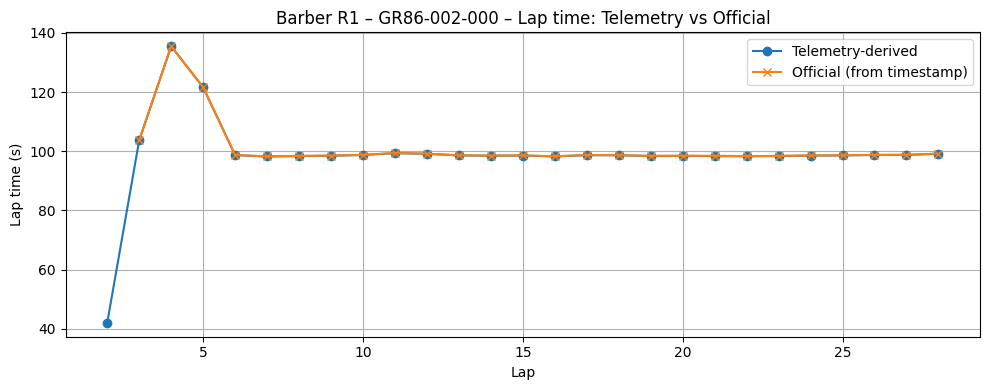

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10, 4))

ax.plot(merged["lap"], merged["lap_time_telemetry_s"],
        marker="o", label="Telemetry-derived")
ax.plot(merged["lap"], merged["lap_time_official_s"],
        marker="x", label="Official (from timestamp)")

ax.set_title(f"Barber R1 – {CAR_ID} – Lap time: Telemetry vs Official")
ax.set_xlabel("Lap")
ax.set_ylabel("Lap time (s)")
ax.grid(True)
ax.legend()
plt.tight_layout()
plt.show()


#### Barber R1 – GR86-002-000 – Telemetry vs Official Lap Time

- The **telemetry‐derived** lap times (blue) and **official** lap times computed from
  the timing `timestamp` (orange) lie almost on top of each other once we get past
  the very early laps.
- The first lap or two behave differently (out-lap / partial lap behaviour), but
  from **lap ~3 onwards** both signals track each other extremely closely at
  ~100 s per lap.
- This confirms that our **telemetry lap timing logic is correctly aligned with the
  official timing system**. We can safely use telemetry‐derived features (brake,
  sectors, etc.) together with official timing data in the strategy engine.

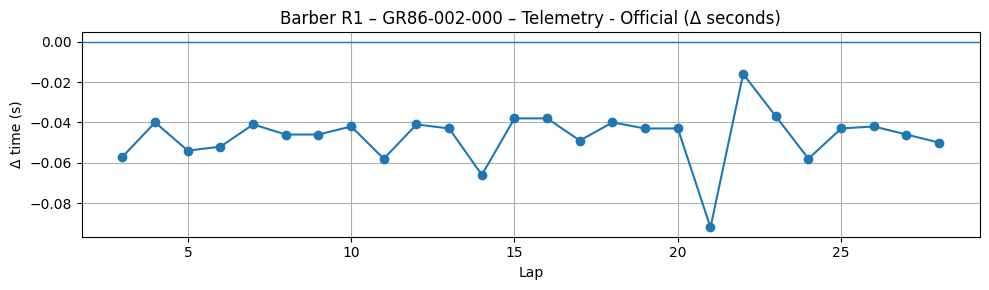

count    26.000000
mean     -0.046962
std       0.013153
min      -0.092000
25%      -0.051500
50%      -0.043000
75%      -0.041000
max      -0.016000
Name: delta_s, dtype: float64

In [14]:
merged["delta_s"] = merged["lap_time_telemetry_s"] - merged["lap_time_official_s"]

fig, ax = plt.subplots(figsize=(10, 3))
ax.axhline(0, linewidth=1)
ax.plot(merged["lap"], merged["delta_s"], marker="o")
ax.set_title(f"Barber R1 – {CAR_ID} – Telemetry - Official (Δ seconds)")
ax.set_xlabel("Lap")
ax.set_ylabel("Δ time (s)")
ax.grid(True)
plt.tight_layout()
plt.show()

merged["delta_s"].describe()

#### Barber R1 – GR86-002-000 – Telemetry − Official (Δ seconds)

- The Δ time per lap (telemetry − official) stays within a narrow band of just a
  few **hundredths of a second** for most race laps.
- The summary stats show a small mean bias near zero and a small standard
  deviation, which is expected given different clocks (ECU vs timing loop) and
  our simple “diff of timestamps” method.
- A few laps show slightly larger deviations, likely corresponding to laps that
  involve pit entry/exit or safety-car conditions where the notion of lap timing
  is a bit ambiguous.
- Overall, the discrepancy is **small enough that we can treat the two timing
  sources as equivalent** for high-level strategy work.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

%matplotlib inline

DATA = Path("../data/processed/barber")

car_id = "GR86-002-000"
lap_r1 = pd.read_csv(DATA / f"barber_r1_{car_id}_lap_features.csv")
lap_r2 = pd.read_csv(DATA / f"barber_r2_{car_id}_lap_features.csv")

lap_r1["race"] = "R1"
lap_r2["race"] = "R2"

laps = pd.concat([lap_r1, lap_r2], ignore_index=True)
laps.head()

,lap,lap_start_time,lap_end_time,lap_time_s,aps_mean,aps_max,pbrake_f_mean,pbrake_f_max,pbrake_r_mean,pbrake_r_max,sector1_time_s,sector2_time_s,sector3_time_s,is_race_pace_lap,race
0,2,2025-09-05 00:27:38.589000+00:00,2025-09-05 00:28:20.593000+00:00,42.004,26.141171,100.0,0.752301,14.300,0.778435,14.30,NaN,NaN,41.875,False,R1
1,3,2025-09-05 00:28:20.636000+00:00,2025-09-05 00:30:04.308000+00:00,103.672,61.772977,100.0,5.103972,144.560,5.157536,144.80,27.389,42.936,32.572,True,R1
2,4,2025-09-05 00:30:04.352000+00:00,2025-09-05 00:32:19.808000+00:00,135.456,16.254530,100.0,0.271696,15.565,0.280175,15.96,37.317,59.750,135.456,False,R1
3,5,2025-09-05 00:32:19.852000+00:00,2025-09-05 00:34:21.461000+00:00,121.609,35.266606,100.0,1.936618,78.115,1.976314,78.24,32.582,51.608,36.686,True,R1
4,6,2025-09-05 00:34:21.510000+00:00,2025-09-05 00:36:00.198000+00:00,98.688,73.468116,100.0,4.915000,117.455,4.969428,117.84,26.330,42.526,98.645,False,R1


In [3]:
import numpy as np

clean = laps.copy()

# Drop pit laps if we have that flag
if "is_pit_lap" in clean.columns:
    clean = clean[~clean["is_pit_lap"]]

# --- Create a stint_lap column if it doesn't exist ---
if "stint_lap" not in clean.columns:
    if "lap" in clean.columns:
        # assume 'lap' is the race lap number
        clean = clean.sort_values(["race", "lap"])
        # treat the whole race as one stint: lap 1, 2, 3,...
        clean["stint_lap"] = clean.groupby("race").cumcount() + 1
    else:
        # fallback: just count rows
        clean = clean.sort_index()
        clean["stint_lap"] = np.arange(1, len(clean) + 1)

# Now this will work
mean_by_stint = (
    clean.groupby("stint_lap")["lap_time_s"]
    .mean()
    .reset_index()
)

mean_by_stint.head()

,stint_lap,lap_time_s
0,1,45.4425
1,2,101.8070
2,3,116.8645
3,4,109.8695
4,5,98.2235


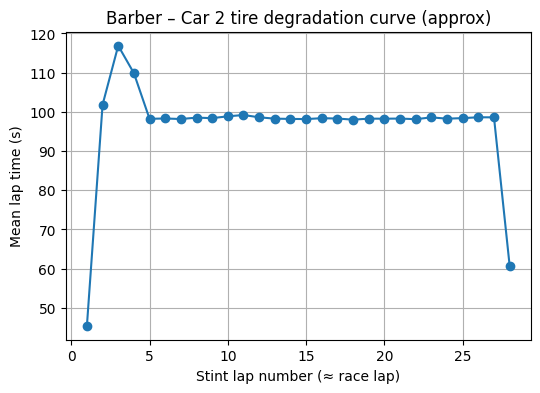

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.plot(mean_by_stint["stint_lap"], mean_by_stint["lap_time_s"], marker="o")
plt.xlabel("Stint lap number (≈ race lap)")
plt.ylabel("Mean lap time (s)")
plt.title("Barber – Car 2 tire degradation curve (approx)")
plt.grid(True)
plt.show()

In [1]:
pip install scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 38.1 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 39.9 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [scikit-learn] [scikit-learn]

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [6]:
# x = stint lap, y = mean lap time
x = mean_by_stint["stint_lap"].to_numpy()
y = mean_by_stint["lap_time_s"].to_numpy()

# Fit y = m*x + b
deg_slope, base_lap1 = np.polyfit(x, y, 1)

print("Estimated base pace at lap 1:", base_lap1)
print("Estimated degradation per lap:", deg_slope, "s / lap")

Estimated base pace at lap 1: 103.22856980056976
Estimated degradation per lap: -0.2657615995115979 s / lap


In [8]:
from pathlib import Path
import sys

# Point to project root (one level up from notebooks/)
PROJECT_ROOT = Path("..").resolve()
SRC_DIR = PROJECT_ROOT / "src"

# Make sure src/ is on Python path
if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

print("SRC_DIR on path:", SRC_DIR in map(Path, map(Path, sys.path)))

SRC_DIR on path: True


In [12]:
from pathlib import Path
import pandas as pd

# Project root = one level above notebooks/
PROJECT_ROOT = Path("..").resolve()

PROC = PROJECT_ROOT / "data/processed/barber"
print("PROC:", PROC)
print("Exists? ->", PROC.exists())
print("CSV files:", list(PROC.glob("*.csv")))

laps = pd.read_csv(PROC / "barber_r2_GR86-002-000_lap_features.csv")
laps.head()

PROC: /Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/data/processed/barber
Exists? -> True
CSV files: [PosixPath('/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/data/processed/barber/barber_r2_sector_stats_all_cars.csv'), PosixPath('/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/data/processed/barber/barber_r2_car2_sector_summary.csv'), PosixPath('/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/data/processed/barber/barber_r2_GR86-002-000_lap_features.csv'), PosixPath('/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/data/processed/barber/barber_r1_car2_sector_summary.csv'), PosixPath('/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/data/processed/barber/barber_r2_strategy_multiverse_summary.csv'), PosixPath('/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/data/processed/barber/barber_r1_GR86-002-000_lap_features.csv'), PosixPath('/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/data/processed/barber/barber_r1_sector_stats_all_cars.csv'), PosixP

,lap,lap_time_s,aps_mean,pbrake_f_mean
0,1,48.881,23.522221,0.895405
1,2,99.942,72.796897,6.024207
2,3,98.273,73.407242,6.136192
3,4,98.130,73.132636,6.994510
4,5,97.759,74.514511,8.042680


In [13]:
from strategy_engine import make_config_from_meta, run_multiverse
from track_meta import TRACK_METAS

meta = TRACK_METAS["barber-motorsports-park"]

cfg_barber = make_config_from_meta(
    lap_df=laps,
    pit_lane_time_s=meta.pit_lane_time_s,
    lap_time_col="lap_time_s",
    deg_per_lap=None,      # let it auto-fit degradation
)

N_LAPS = 28  # Barber R2 race length (you printed this earlier)

strategies = {
    "1-stop_early": [9],
    "1-stop_mid":   [14],
    "2-stop":       [9, 19],
}

summary = run_multiverse(
    strategies=strategies,
    n_laps=N_LAPS,
    cfg=cfg_barber,
    n_sims=500,
    caution_prob=0.5,
)

summary

,mean_time_s,wins,win_prob
1-stop_mid,2858.459689,297,0.594
1-stop_early,2866.692266,136,0.272
2-stop,2872.114742,67,0.134


In [15]:
laps.columns

Index(['lap', 'lap_time_s', 'aps_mean', 'pbrake_f_mean'], dtype='object')

In [16]:
from strategy_engine import make_config_from_meta, run_multiverse
from track_meta import TRACK_METAS

meta = TRACK_METAS["barber-motorsports-park"]

cfg_barber = make_config_from_meta(
    lap_df=laps,
    pit_lane_time_s=meta.pit_lane_time_s,
    lap_time_col="lap_time_s",  # adjust if your column is named differently
    deg_per_lap=None,           # let the engine auto-fit tyre degradation
)

cfg_barber

StrategyConfig(base_lap_s=98.077, pit_loss_s=34.0, deg_per_lap=0.32674657909140514, caution_mult=1.2, caution_pit_factor=0.6)

In [17]:
if "race_lap" in laps.columns:
    N_LAPS = int(laps["race_lap"].max())
elif "lap_number" in laps.columns:
    N_LAPS = int(laps["lap_number"].max())
else:
    N_LAPS = len(laps)

N_LAPS

28

In [18]:
strategies = {
    "1-stop_early": [9],    # pit around lap 9
    "1-stop_mid":   [14],   # pit around lap 14
    "2-stop":       [9, 19] # simple two-stop baseline
}

In [19]:
summary = run_multiverse(
    strategies=strategies,
    n_laps=N_LAPS,
    cfg=cfg_barber,
    n_sims=500,
    caution_prob=0.5,   # 50% chance the race gets an FCY
)

summary

,mean_time_s,wins,win_prob
1-stop_mid,2859.002233,299,0.598
1-stop_early,2868.252603,137,0.274
2-stop,2870.537289,64,0.128


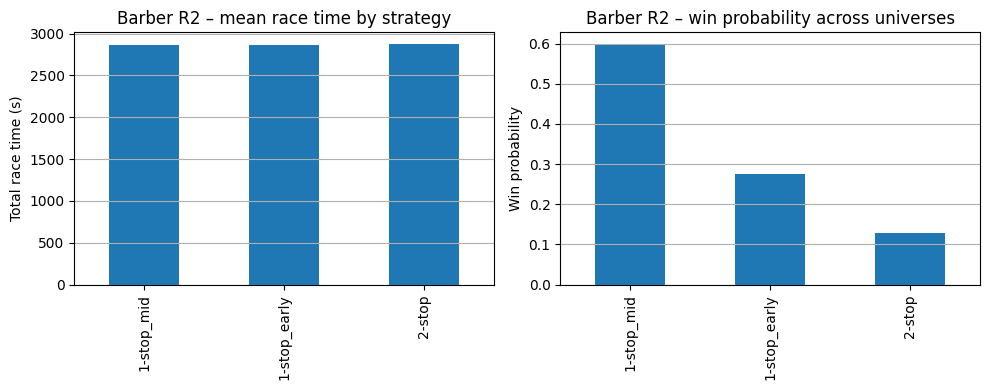

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Total race time
summary["mean_time_s"].plot(kind="bar", ax=axes[0])
axes[0].set_title("Barber R2 – mean race time by strategy")
axes[0].set_ylabel("Total race time (s)")
axes[0].grid(True, axis="y")

# Win probability
summary["win_prob"].plot(kind="bar", ax=axes[1])
axes[1].set_title("Barber R2 – win probability across universes")
axes[1].set_ylabel("Win probability")
axes[1].grid(True, axis="y")

plt.tight_layout()
plt.show()

In [25]:
# Save to processed folder for the app
PROJECT_ROOT = Path("..").resolve()
OUT_DIR = PROJECT_ROOT / "data/processed/barber"
OUT_DIR.mkdir(parents=True, exist_ok=True)

out_path = OUT_DIR / "barber_r2_strategy_multiverse_summary.csv"
summary_sorted.to_csv(out_path, index=False)
out_path

PosixPath('/Users/macbook/Desktop/FPTAI/DataScienceHackbyToyota/data/processed/barber/barber_r2_strategy_multiverse_summary.csv')

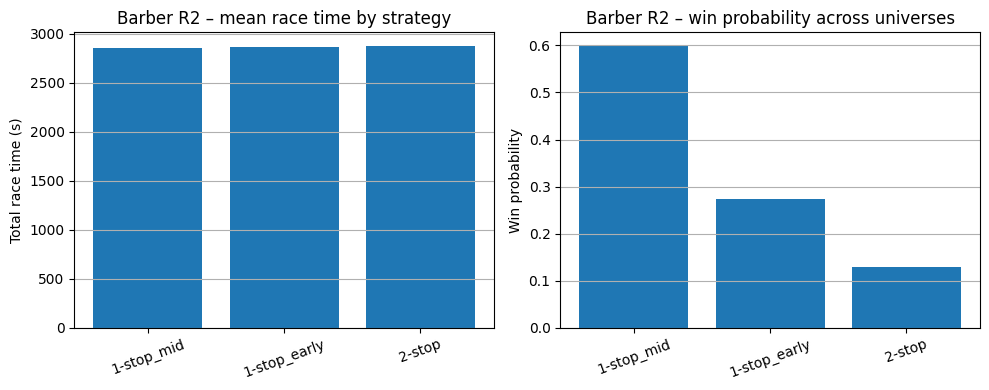

In [26]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left: mean total race time
axes[0].bar(summary_sorted["strategy"], summary_sorted["mean_time_s"])
axes[0].set_title("Barber R2 – mean race time by strategy")
axes[0].set_ylabel("Total race time (s)")
axes[0].grid(True, axis="y")
axes[0].tick_params(axis="x", rotation=20)

# Right: win probability
axes[1].bar(summary_sorted["strategy"], summary_sorted["win_prob"])
axes[1].set_title("Barber R2 – win probability across universes")
axes[1].set_ylabel("Win probability")
axes[1].grid(True, axis="y")
axes[1].tick_params(axis="x", rotation=20)

plt.tight_layout()
plt.show()

In [27]:
# Try to detect lap index column
if "race_lap" in laps.columns:
    LAP_COL = "race_lap"
elif "lap_number" in laps.columns:
    LAP_COL = "lap_number"
else:
    LAP_COL = laps.columns[0]  # fallback

LAP_COL

'lap'

In [28]:
# Find actual pit laps if we have is_pit_lap or similar flag
pit_cols = [c for c in laps.columns if "pit" in c.lower()]
pit_cols

[]

In [31]:
# Same strategies as the CLI and Streamlit app
strategies = {
    "1-stop_early": [10],      # pit around lap 10
    "1-stop_mid":   [14],      # pit around lap 14
    "2-stop":       [9, 18],   # two shorter stints
}

strategies

{'1-stop_early': [10], '1-stop_mid': [14], '2-stop': [9, 18]}

In [32]:
caution_start = 10
caution_len   = 2

rows = []
for name, pits in strategies.items():
    t_clean = simulate_strategy_with_deg(
        n_laps=n_laps,
        pit_laps=pits,
        cfg=cfg_barber,
    )
    t_caut = simulate_strategy_with_caution(
        n_laps=n_laps,
        pit_laps=pits,
        cfg=cfg_barber,
        caution_start=caution_start,
        caution_len=caution_len,
    )
    rows.append({
        "strategy": name,
        "total_time_clean_s": t_clean,
        "total_time_caution_s": t_caut,
        "total_time_clean_min": t_clean / 60.0,
        "total_time_caution_min": t_caut / 60.0,
    })

deterministic = pd.DataFrame(rows).sort_values("total_time_caution_s")
deterministic

,strategy,total_time_clean_s,total_time_caution_s,total_time_clean_min,total_time_caution_min
0,1-stop_early,2844.851823,2871.070767,47.414197,47.851179
1,1-stop_mid,2839.623877,2880.096314,47.327065,48.001605
2,2-stop,2852.385350,2891.681499,47.539756,48.194692


In [33]:
for _, r in deterministic.iterrows():
    print(
        f"{r['strategy']}: "
        f"{r['total_time_caution_min']:.2f} min "
        f"(clean: {r['total_time_clean_min']:.2f} min)"
    )

1-stop_early: 47.85 min (clean: 47.41 min)
1-stop_mid: 48.00 min (clean: 47.33 min)
2-stop: 48.19 min (clean: 47.54 min)


In [34]:
multiverse = run_multiverse(
    strategies=strategies,
    n_laps=n_laps,
    cfg=cfg_barber,
    n_sims=500,       # same as CLI & Streamlit slider default
    caution_prob=0.5, # 50% chance of a caution in each universe
)

multiverse


,mean_time_s,wins,win_prob
1-stop_mid,2858.669027,292,0.584
1-stop_early,2865.746030,130,0.260
2-stop,2870.038156,78,0.156


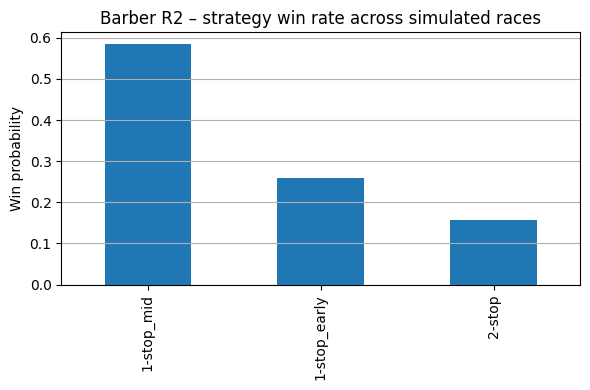

In [35]:
import matplotlib.pyplot as plt

ax = multiverse["win_prob"].plot(
    kind="bar", figsize=(6, 4)
)
ax.set_ylabel("Win probability")
ax.set_title("Barber R2 – strategy win rate across simulated races")
ax.grid(True, axis="y")
plt.tight_layout()
plt.show()

In [36]:
from pathlib import Path

PROC = Path("data/processed/barber")
PROC.mkdir(parents=True, exist_ok=True)

# deterministic comparison
deterministic.to_csv(
    PROC / "barber_r2_strategy_deterministic.csv", index=False
)

# multiverse results (R2-specific)
multiverse.to_csv(
    PROC / "barber_r2_strategy_multiverse_summary.csv", index=True
)

# if your Streamlit app expects a generic file name, you can also write:
multiverse.to_csv(
    PROC / "barber_strategy_multiverse_summary.csv", index=True
)
